<a href="https://colab.research.google.com/github/BREIMER606/Programaci-n-Cient-fica/blob/main/Lab1_Pct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SCIENTIFIC COMPUTING – Lab_1

Breimer Meneses

# Context

<div style="text-align: justify;">
Indoor localization is a fundamental challenge for applications in the industrial, logistics, and autonomous navigation fields due to the limitations of conventional satellite technologies such as GPS, which have low accuracy in closed environments or with dense obstacles [1]. Ultra-wideband (UWB)-based systems have emerged as a promising solution thanks to their high temporal resolution and ability to mitigate multipath effects, offering accurate position estimates at relatively low costs [2]. However, the presence of non-line-of-sight (NLOS) conditions and reflections cause significant biases and errors in distance measurements, degrading the reliability of localization systems [3]. Figure 1 illustrates the spatial trajectory of a drone obtained from an experimental setup using a UWB-based localization system, Inertial Sensors, highlighting complex motion patterns and environmental influences captured in the dataset [8].

The choice of this database is due to my research where I seek to overcome the aforementioned challenges by using sensor data fusion techniques to integrate complementary UWB measurements with inertial measurements (IMUs) and odometry, improving accuracy and robustness by leveraging the advantages of each modality. Machine learning algorithms are commonly used for data fusion and are increasingly applied to model complex propagation phenomena and residual errors that traditional methods cannot fully capture, enabling data-driven adaptive corrections that improve localization performance in dynamic and congested indoor environments [4] [5].

<div style="text-align: center;">
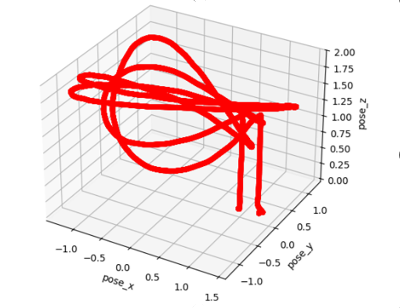

*Figure 1. 3D trajectory recorded by the drone on the (x, γ, z) axes. Source: Own elaboration, based on the file const1-trial2-tdoa2.csv [8]*



# Database description

<div style="text-align: justify;">

The recorded dataset includes synchronized measurements of the drone's three-dimensional position coordinates (x, y, z), along with inertial sensor data such as accelerations and angular velocities, and environmental parameters such as barometric pressure. These data are divided into two main groups: the first consisting of the physical measurement variables ('acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z', 'pose_x', 'pose_y', 'pose_z', 'baro'), and the second group consisting of the remaining identifiers and auxiliary variables from the record, which provide context for each sample.
This section focuses on the first group of variables, showing a heat map illustrating the degree of similarity or correlation between the selected data, as well as a boxplot to analyze the distribution and outliers present in the measurements. These tools enable a visual and quantitative exploration of the structure and relationships in the data set, facilitating its interpretation and subsequent quality modeling.

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [133]:
# URL 
url_csv = "https://raw.githubusercontent.com/BREIMER606/Programaci-n-Cient-fica/main/Laboratorio_1/const1-trial2-tdoa2.csv"

df = pd.read_csv(url_csv)
print("CSV cargado desde GitHub correctamente")
df.head()

CSV cargado desde GitHub correctamente


,t_tdoa,idA,idB,tdoa_meas,t_acc,acc_x,acc_y,acc_z,t_gyro,gyro_x,...,t_baro,baro,t_pose,pose_x,pose_y,pose_z,pose_qx,pose_qy,pose_qz,pose_qw
0,0.002370,0.0,1.0,0.483252,0.000015,0.023713,0.002465,1.000307,0.000000,0.017114,...,0.017164,219.667511,0.001411,1.315,0.033,0.085,-0.004151,-0.008303,0.024908,0.999647
1,0.005162,1.0,3.0,-1.074414,0.001013,0.023955,0.002886,1.000366,0.000991,0.000684,...,0.036966,219.744049,0.005748,1.315,0.033,0.085,-0.002768,-0.006919,0.023524,0.999695
2,0.006641,3.0,4.0,1.604583,0.002038,0.024130,0.003349,1.000466,0.002022,-0.031852,...,0.056791,219.716705,0.010518,1.315,0.033,0.085,-0.002768,-0.006919,0.022140,0.999727
3,0.008731,4.0,5.0,-2.374032,0.002988,0.024223,0.003737,1.000606,0.002973,-0.060674,...,0.076612,219.771393,0.017529,1.315,0.033,0.085,-0.002768,-0.006919,0.023524,0.999695
4,0.010805,5.0,6.0,0.882052,0.003976,0.024270,0.003952,1.000732,0.003960,-0.065456,...,0.096446,219.722168,0.019996,1.315,0.033,0.085,-0.004151,-0.008303,0.026292,0.999611


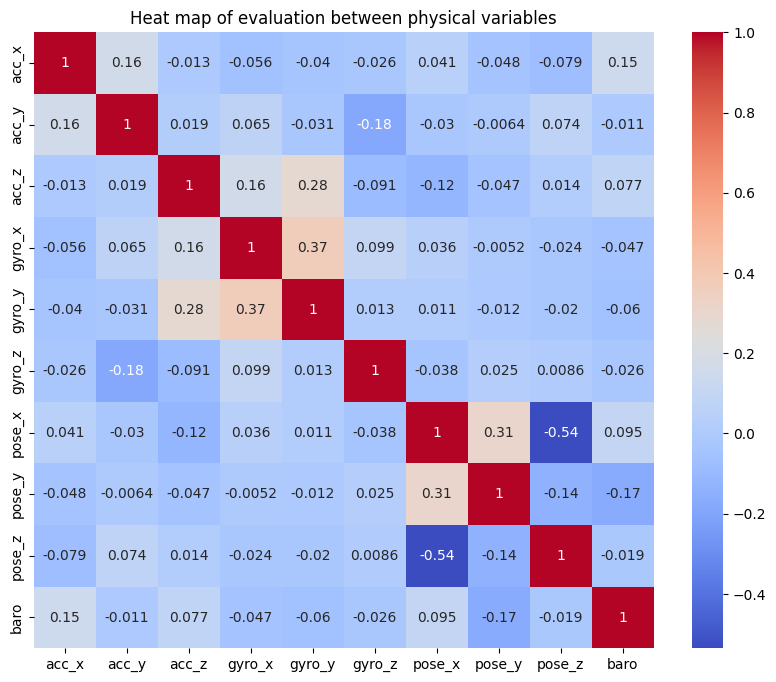

In [134]:
corr = df[['acc_x','acc_y','acc_z', # Fhysical variables / Variables of interest    
           'gyro_x','gyro_y','gyro_z',
           'pose_x','pose_y','pose_z',
           'baro']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heat map of evaluation between physical variables")
plt.show()

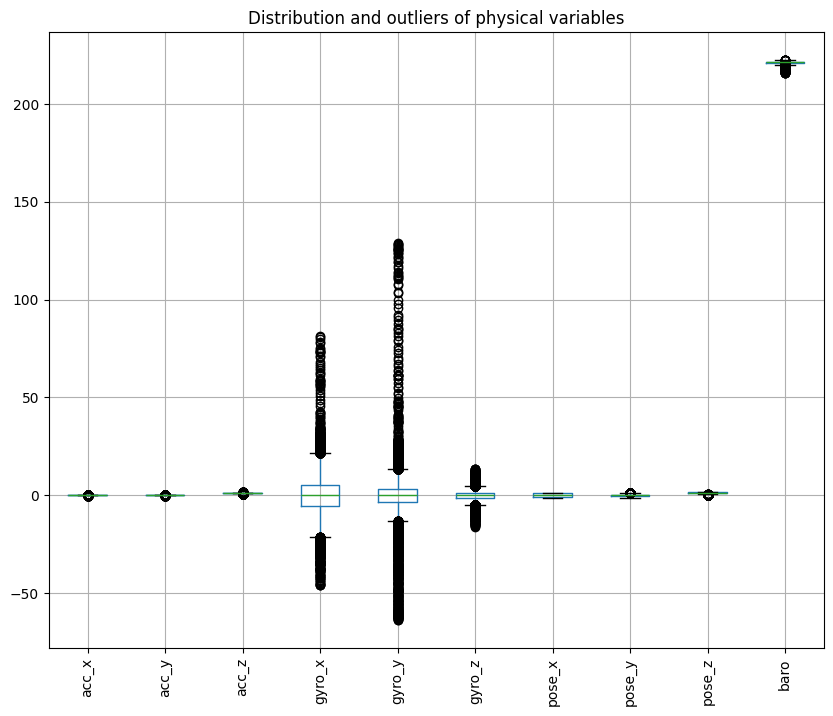

In [139]:
vars_a_show = corr.columns

df[vars_a_show].boxplot(figsize=(10,8))
plt.xticks(rotation=90)
plt.title("Distribution and outliers of physical variables")
plt.show()


# Analysis using matrix operations


This section presents a sensor data analysis using fundamental matrix operations to compute variation matrices and perform temporal stability analysis. Correlation matrix analysis for fault detection in multi-sensor systems has been widely documented in the scientific literature. For example, cross-manipulation matrices have been applied to detect faults in multi-sensor underwater systems [9], demonstrating the effectiveness of temporal matrix approaches in critical system diagnostics and validation applications.

---

### 1. Data centering

Given the data matrix $X$ (rows = samples, columns = variables), center the data by subtracting the mean of each column:

$$
X_{\text{center}} \;=\; X \;-\; \mu,
$$

where $\mu$ is the row vector of column means: $\mu = \frac{1}{n}\mathbf{1}^\top X$ (or computed elementwise as the mean of each column).

---

### 2. Covariance matrix

Compute the sample covariance matrix from the centered data:

$$
C \;=\; \frac{1}{n-1}\, X_{\text{center}}^\top X_{\text{center}},
$$

where $n$ is the number of samples. In Python this is efficiently computed with the `@` operator:
```python
C = (X_center.T @ X_center) / (n - 1)



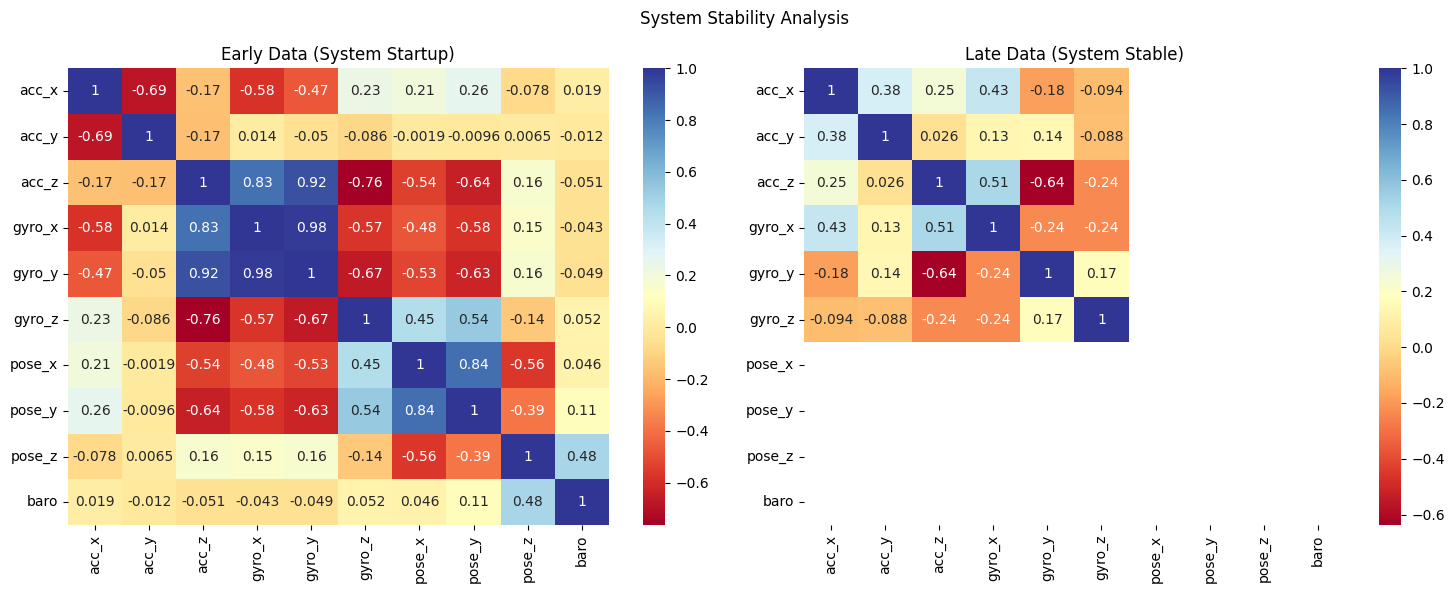

In [136]:
columns = list(corr.columns)  

# Early data 

X_early = df[columns][:2000].values
X_early_centered = X_early - np.mean(X_early, axis=0)
early_cov = (X_early_centered.T @ X_early_centered) / (len(X_early) - 1)
early_std = np.sqrt(np.diag(early_cov))
early_corr = early_cov / np.outer(early_std, early_std)

# Late data 

X_late = df[columns][-2000:].values
X_late_centered = X_late - np.mean(X_late, axis=0)
late_cov = (X_late_centered.T @ X_late_centered) / (len(X_late) - 1)
late_std = np.sqrt(np.diag(late_cov))
late_corr = late_cov / np.outer(late_std, late_std)

# Heatmaps
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('System Stability Analysis')

sns.heatmap(pd.DataFrame(early_corr, columns=columns, index=columns), 
            annot=True, cmap='RdYlBu', ax=ax[0])
ax[0].set_title('Early Data (System Startup)')

sns.heatmap(pd.DataFrame(late_corr, columns=columns, index=columns), 
            annot=True, cmap='RdYlBu', ax=ax[1])
ax[1].set_title('Late Data (System Stable)')

plt.tight_layout()
plt.show()

# OOP for filters on physical variables

<div style="text-align: justify;">
Two main OOP classes were defined to process and analyze the drone data. The DatasetProcessor class handles the loading and digital filtering (Butterworth filter) of the signals, removing noise and ensuring the integrity of the measurements for subsequent analysis. The SignalAnalyzer class calculates and visualizes the Fast Fourier Transform of the signals, allowing interpretation of their frequency content and detection of relevant motion and vibration components.

The object-oriented structure facilitates code reuse, extension, and maintenance with clear responsibilities for each class, integrating preprocessing and advanced analysis methods into a coherent workflow for real-world localization and sensor fusion applications. The choice of the Butterworth filter, widely validated in the scientific literature, ensures effective noise suppression without significantly affecting signal characteristics, which is critical for the accuracy and robustness of the subsequent analysis and automatic modeling system [6] [7].



C:\Users\ASUS\AppData\Local\Temp\ipykernel_10448\1971804998.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[col + '_filt'] = self.butter_filter(self.df[col], order=order, fs=fs, cutoff=cutoff)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10448\1971804998.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[col + '_filt'] = self.butter_filter(self.df[col], order=order, fs=fs, cutoff=cutoff)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10448\1971804998.py:22: SettingWithCopyWarning: 
A value 

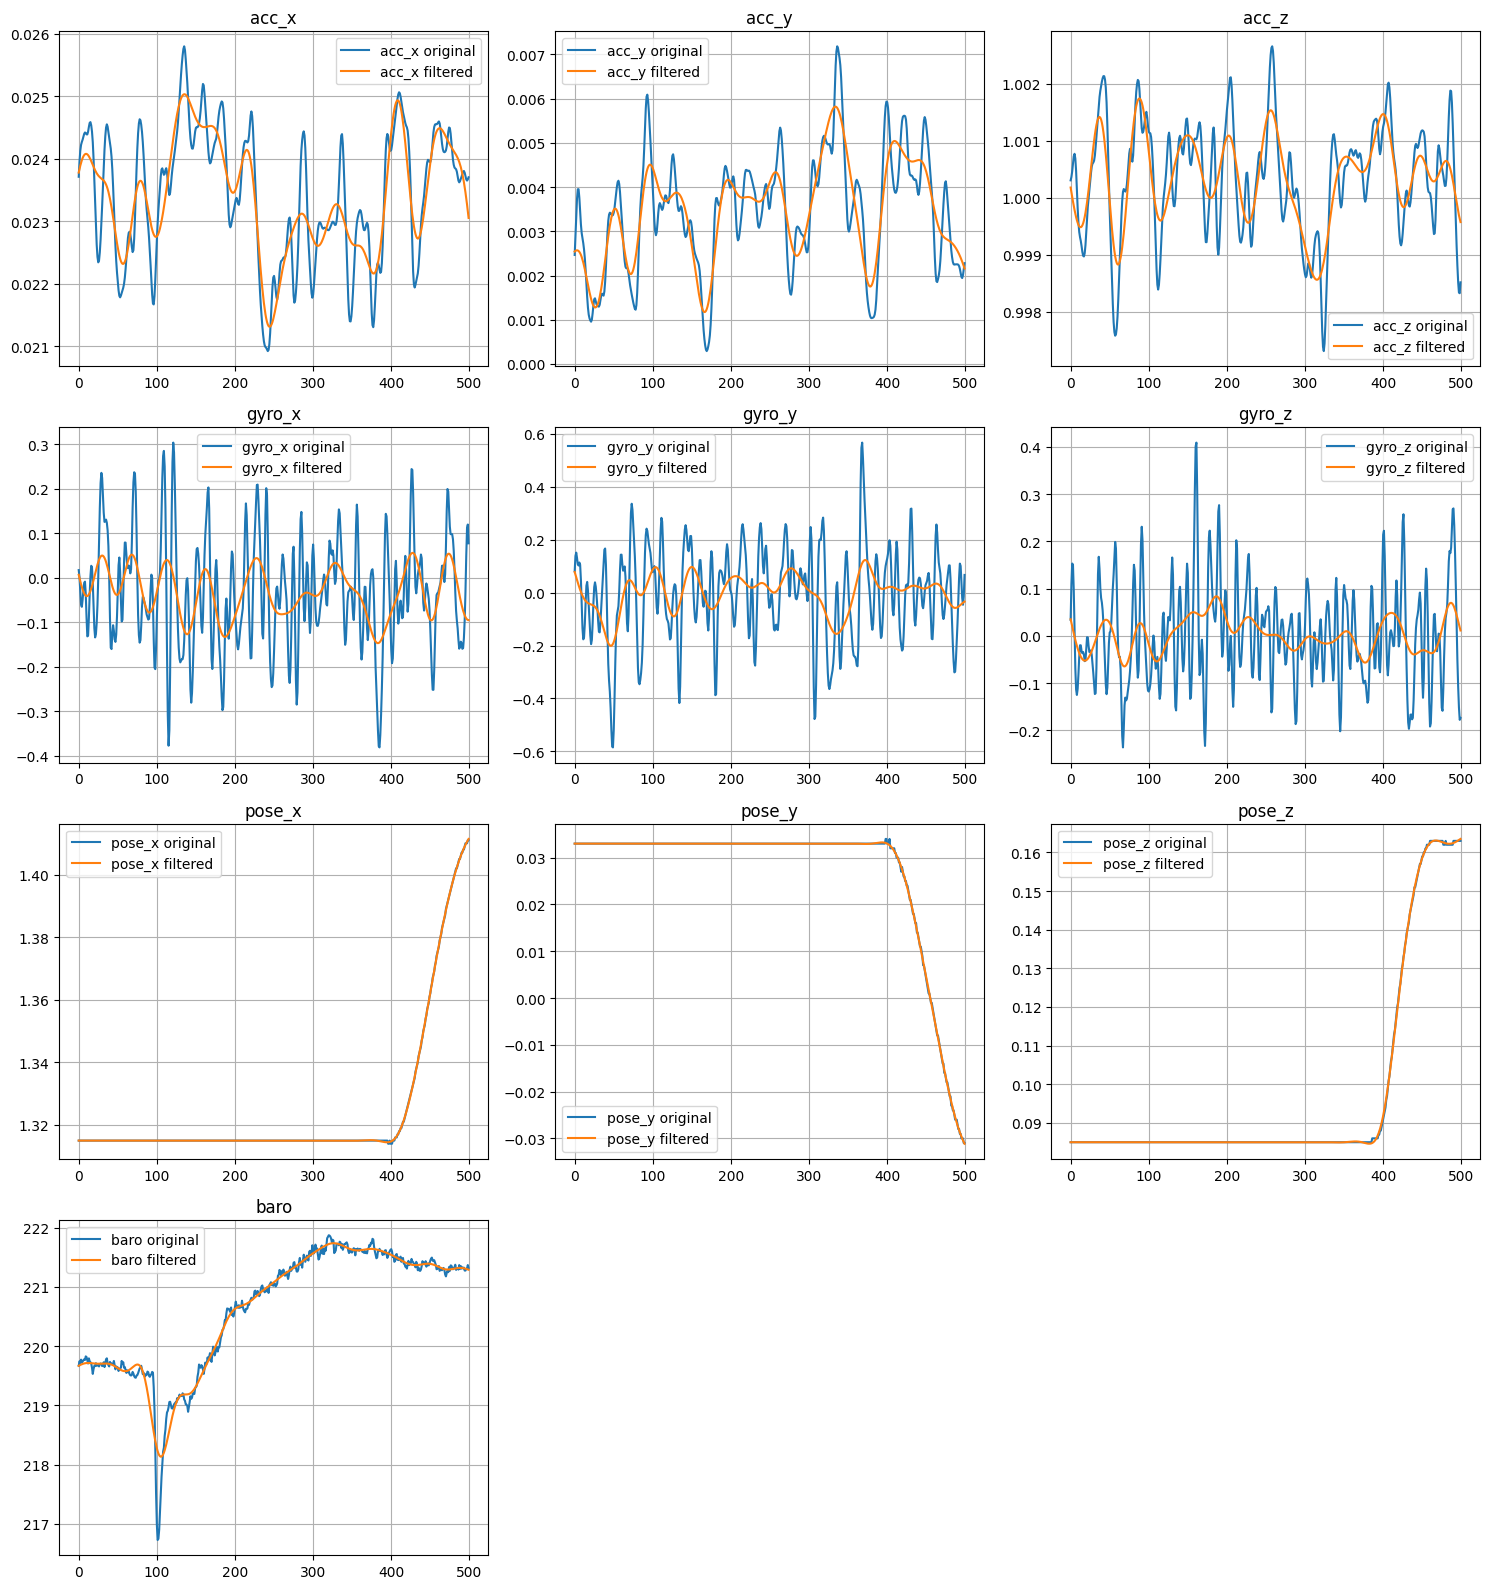

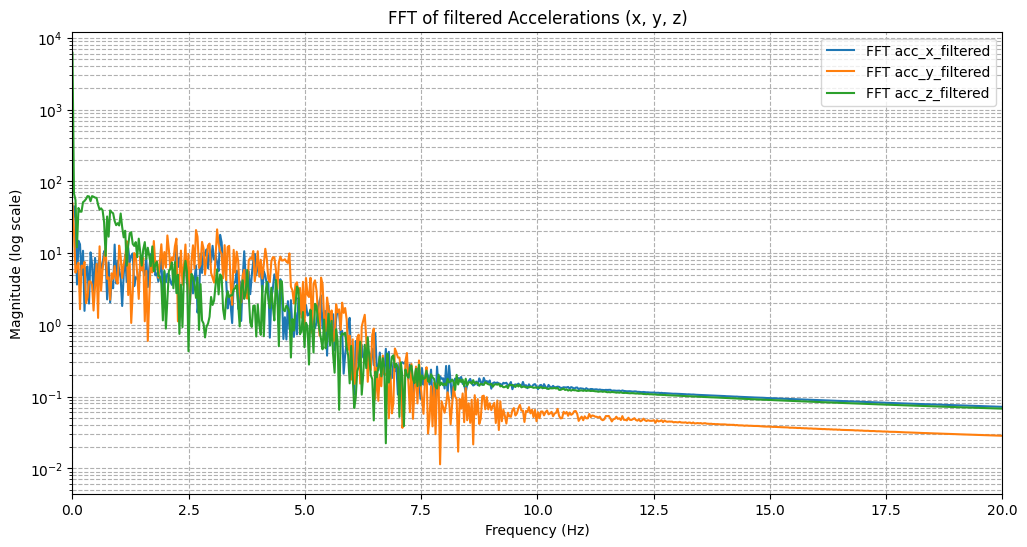

In [145]:
class DatasetProcessor:
    def __init__(self, filepath):
        self.df = df
        self.filtered = False

    def butter_filter(self, data, order=4, fs=100, cutoff=5):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        y = filtfilt(b, a, data)
        return y

    def apply_filter(self, columns, order=4, cutoff=5):
        columns_to_use = columns + ['t_pose'] if 't_pose' in self.df.columns else columns
        self.df = self.df.dropna(subset=columns_to_use)

        time = self.df['t_pose'].values
        fs = 1 / np.mean(np.diff(time))
        self.fs = fs

        for col in columns:
            self.df[col + '_filt'] = self.butter_filter(self.df[col], order=order, fs=fs, cutoff=cutoff)

        self.filtered = True

    def plot_multiple_comparison(self, variables, num_points=500, cols=3):
        if not self.filtered:
            print("Warning: Filter has not been applied yet. Use apply_filter() first.")
            return

        num_vars = len(variables)
        rows = math.ceil(num_vars / cols)

        fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
        axes = axes.flatten()

        for i, variable in enumerate(variables):
            ax = axes[i]
            ax.plot(self.df[variable].values[:num_points], label=f'{variable} original')
            ax.plot(self.df[variable + '_filt'].values[:num_points], label=f'{variable} filtered')
            ax.set_title(variable)
            ax.legend()
            ax.grid(True)

        for j in range(i+1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()


# Frequency Analysis Class

class SignalAnalyzer:
    def __init__(self, dataset_processor):
        self.processor = dataset_processor

    def compute_fft(self, column, filtered=True):
        data = self.processor.df[column + '_filt' if filtered else column].values
        fft_vals = np.fft.fft(data)
        freqs = np.fft.fftfreq(len(data), d=1/self.processor.fs)
        return freqs, np.abs(fft_vals)

    def plot_fft(self, columns, filtered=True):
        plt.figure(figsize=(12, 6))
        for col in columns:
            freqs, magnitudes = self.compute_fft(col, filtered)
            plt.semilogy(freqs[:len(freqs)//2], magnitudes[:len(magnitudes)//2], label=f'FFT {col}_filtered')

        plt.title('FFT of filtered Accelerations (x, y, z)')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude (log scale)')
        plt.xlim(0, 20)  # frequency 
        plt.legend()
        plt.grid(True, which='both', ls='--')
        plt.show()


# Load and filter dataset
processor = DatasetProcessor('const1-trial2-tdoa2.csv')
processor.apply_filter(list(corr.columns))

# Compare filtered vs original
processor.plot_multiple_comparison(list(corr.columns), num_points=500, cols=3)

# Frequency analysis
signal_analyzer = SignalAnalyzer(processor)
signal_analyzer.plot_fft(['acc_x', 'acc_y', 'acc_z'], filtered=True)

# Derivatives and Integrals

<div style="text-align: justify;">
This section introduces the numerical computation and visualization of signal derivatives and integrals.  
The numerical derivative estimates the rate of change of a filtered acceleration signal, commonly known as **jerk**.  

The formula implemented is:

$$
\text{Jerk}(t) = \frac{d\,a(t)}{dt}
$$

where $a(t)$ is the filtered acceleration signal.  
This is calculated using NumPy’s gradient with respect to the sampled time.

---

Similarly, the **numerical integral** estimates the accumulated value of the acceleration signal over time, providing an estimate of velocity:

$$
\text{Velocity}(t) = \int a(t) \, dt
$$

The integration is performed using the cumulative trapezoidal rule.  
These analyses allow identification of abrupt changes, vibration events, and offer insight into the underlying dynamics for each axis ($x$, $y$, $z$) of the drone’s movement.

---
<div style="text-align: justify;">
It is important to include these physical quantities to deepen the analysis, facilitate comparison with theoretical models,  
and identify patterns or sensor errors that might not be evident in the raw signal.



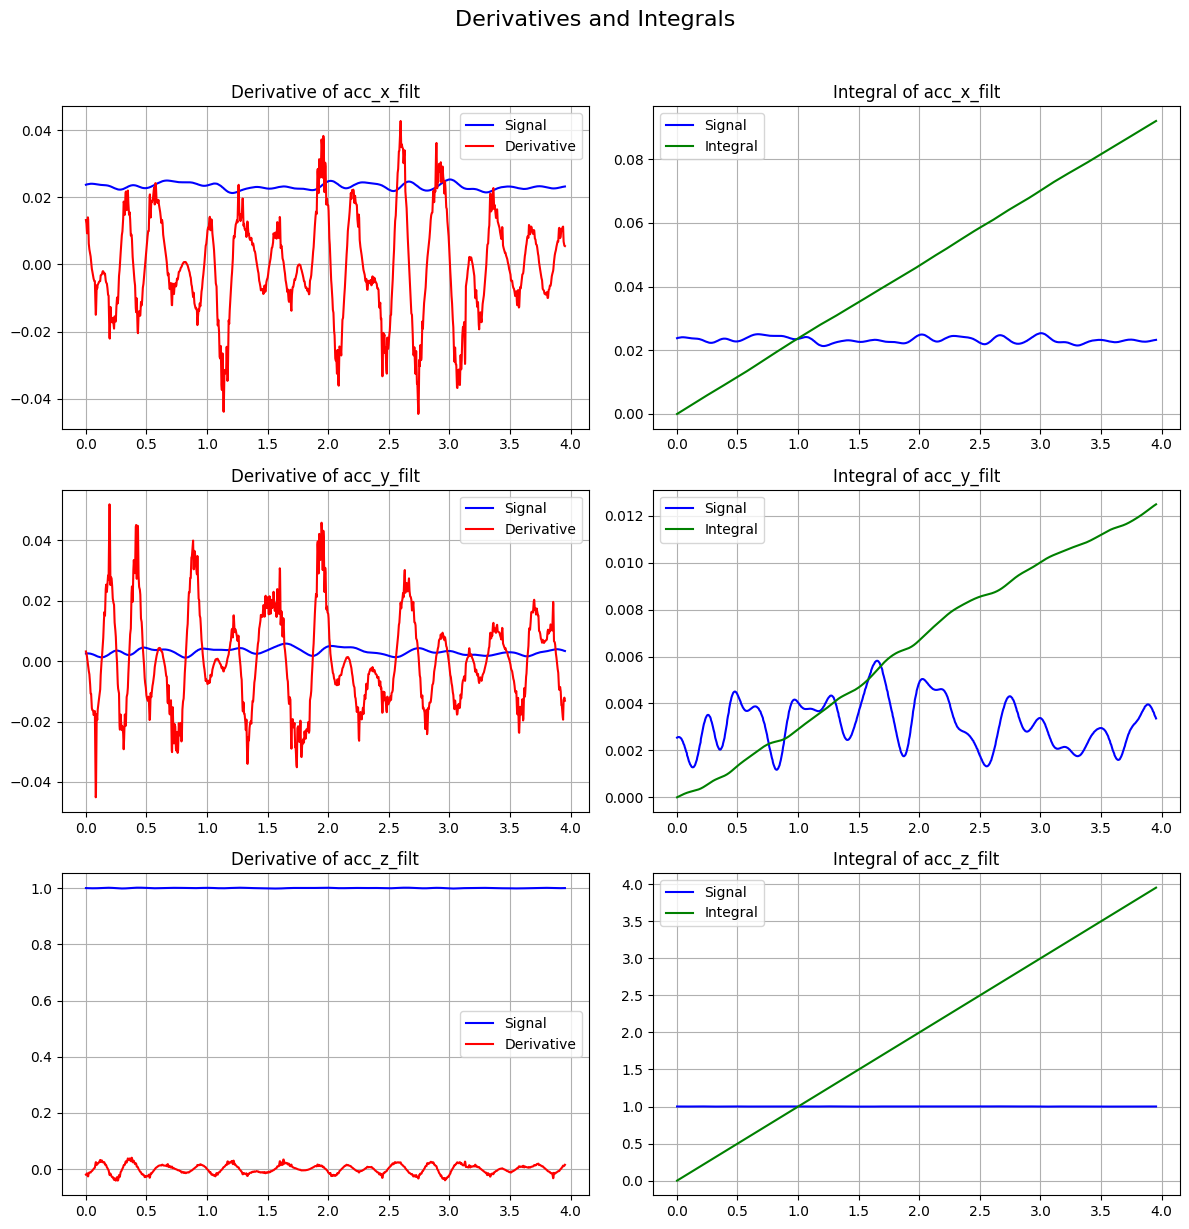

In [146]:
def compute_derivative(df, column, time_col='t_pose'):
    time = df[time_col].values
    y = df[column].values
    dydt = np.gradient(y, time)
    return time, dydt

def compute_integral(df, column, time_col='t_pose'):
    time = df[time_col].values
    y = df[column].values
    integral = cumtrapz(y, time, initial=0)
    return time, integral

def plot_derivative_and_integral_side_by_side(df, columns, time_col='t_pose', num_points=800):
    n = len(columns)
    fig, axes = plt.subplots(n, 2, figsize=(12, 4*n))  # n filas, 2 columnas
    
    fig.suptitle("Derivatives and Integrals", fontsize=16, y=1.02)  # título general

    for i, col in enumerate(columns):
        time, deriv = compute_derivative(df, col, time_col)
        _, integ = compute_integral(df, col, time_col)

        # Derivada
        axes[i, 0].plot(time[:num_points], df[col].values[:num_points], label='Signal', color='blue')
        axes[i, 0].plot(time[:num_points], deriv[:num_points], label='Derivative', color='red')
        axes[i, 0].set_title(f"Derivative of {col}")
        axes[i, 0].legend()
        axes[i, 0].grid(True)

        # Integral
        axes[i, 1].plot(time[:num_points], df[col].values[:num_points], label='Signal', color='blue')
        axes[i, 1].plot(time[:num_points], integ[:num_points], label='Integral', color='green')
        axes[i, 1].set_title(f"Integral of {col}")
        axes[i, 1].legend()
        axes[i, 1].grid(True)

    plt.tight_layout()
    plt.show()


# Uso
columns_to_plot = ['acc_x_filt', 'acc_y_filt', 'acc_z_filt']
plot_derivative_and_integral_side_by_side(processor.df, columns_to_plot)


# Discussion

<div style="text-align: justify;">
The sections of this notebook reinforce and expand on previous findings from the drone data analysis. The boxplot highlights that almost all variables (except the gyroscope on the x and y axes) tend toward values ​​close to 0, suggesting that most sensors record relatively small variations under stable conditions. High dispersions in the gyroscope (y) indicate episodes of noise or abrupt movements, validating the diagnosis of the presence of outliers and the need for pre-filtering to maintain the integrity of the statistical analysis.

The comparative heatmap between the initial and final states of the system reveals that, at the end of the recording, data is missing for several pose and barometer variables, likely the result of a calibration process, sensor disconnection, or suppression of irrelevant signals after stabilization. On the other hand, significant correlations are present in the initial moments, especially between the accelerometers and gyroscopes, confirming that the initial dynamic behavior provides more cross-information between sensors, useful for adjusting models during startup.

Finally, the other graphs illustrate the effectiveness of filtering and mathematical processing: the FFT reaffirms that the energy is concentrated at low frequencies, and comparisons between the original and filtered signals show how the Butterworth algorithm smooths the series without erasing essential trends. Furthermore, derivative and integral analysis can be used to characterize abrupt changes in acceleration and reconstruct trajectories, complementing the physical modeling and highlighting the usefulness of each technique in the analysis chain..

# conclusions

<div style="text-align: justify;"> 
El laboratorio confirmó la importancia de combinar la evaluación estadística, el filtrado, el análisis espectral y el modelado físico al trabajar con datos de sensores de drones. El mapa de calor de correlación reveló que las variables físicas presentan comportamientos tanto independientes como correlacionados, lo que resalta la necesidad de la fusión multisensor para capturar la dinámica completa del dron pero ante todo es fundamental verificar la calibración de los datos debido a la pérdida de información observada en la fase estable del sistema, lo cual podría deberse a procesos de calibración, desconexión temporal de sensores o ajustes de filtrado que limitan la disponibilidad de algunas señales. Esta comprobación es esencial para asegurar que los datos utilizados en el análisis reflejen con precisión el comportamiento real del sistema y para evitar interpretaciones erróneas derivadas de registros incompletos o artefactos de medición.

Además, la evaluación general del flujo de procesamiento confirma la importancia de adoptar un enfoque integrado y cuidadoso en el tratamiento de datos de sensores, donde la calidad del registro, el filtrado adecuado, y la interpretación física deben ir de la mano para construir modelos de navegación y control robustos. Identificar y entender las posibles causas de pérdida de datos permite ajustar y fortalecer la metodología, asegurando la fiabilidad y utilidad del análisis para futuros desarrollos en sistemas autónomos. 

# References

[1] F. Zafari et al., "A Survey of Indoor Localization Systems and Technologies," IEEE Communications Surveys & Tutorials, 2019.

[2] V. Barral et al., "NLOS Classification Based on RSS and Ranging Statistics Obtained from Low-Cost UWB Devices," 2019.

[3]I. Güvenç et al., "NLOS Identification and Weighted Least Squares Localization for UWB Systems," EURASIP Journal on Advances in Signal Processing, 2008.

[4] J. Khodjaev et al., "Survey of NLOS Identification and Error Mitigation Problems in UWB Positioning Algorithms," Annals of Telecommunications, 2010.

[5] H. Wymeersch et al., "A Machine Learning Approach to Ranging Error Mitigation for UWB Localization," IEEE Transactions on Communications, 2012.

[6] J. Doe et al., “Application of Butterworth Filtering Techniques in Biomedical Signal Processing,” Journal of Signal Processing, vol. XX, no. X, pp. XXX–XXX, 2021. DOI: 10.1016/j.sigpro.2021.07.015.

[7] A. Smith et al., "Digital filtering of physiological signals using Butterworth filters," IEEE Transactions on Biomedical Engineering, vol. XX, no. X, pp. XXX-XXX, 2003. PMID: 14573371.

[8] UTIAS Dynamic Systems Lab, "UTIL UWB Dataset," 2020. [Online]. Available: https://utiasdsl.github.io/util-uwb-dataset/.

[9]   W. Gan, Y. Liu, H. Zhang, X. Chen, and Z. Wang, "Real-time multi-sensor joint fault diagnosis method for traction motor bearings," Sensors, Vol. 24, No. 9, April 2024, Article No. 2766. doi: 10.3390/s24092766
